<a href="https://colab.research.google.com/github/Sanchit0820/Heart_Disease_Prediction/blob/main/Data_viz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplot
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
df= pd.read_csv(r'/content/heart.csv')
df.head()




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.rename(columns={'age':'Age', 'sex': 'Sex','cp': 'Chest_pain', 'trestbps' : 'Resting_blood_pressure','chol': 'Cholestrol', 'fbs':'Fasting_blood_sugar','restecg': 'ECG_results',  'thalach': 'Maximum_heart_rate', 'exang':'Exercise_induced_angina','oldpeak': 'ST_depression', 'slope': 'ST_slope', 'ca' : 'Major_ vessels','thal' : 'Thalessemia_types', 'target' : 'Heart_disease'}, inplace=True)
print(df.head())


   Age  Sex  Chest_pain  Resting_blood_pressure  Cholestrol  \
0   52    1           0                     125         212   
1   53    1           0                     140         203   
2   70    1           0                     145         174   
3   61    1           0                     148         203   
4   62    0           0                     138         294   

   Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
0                    0            1                 168   
1                    1            0                 155   
2                    0            1                 125   
3                    0            1                 161   
4                    1            1                 106   

   Exercise_induced_angina  ST_depression  ST_slope  Major_ vessels  \
0                        0            1.0         2               2   
1                        1            3.1         0               0   
2                        1            2.6         0  

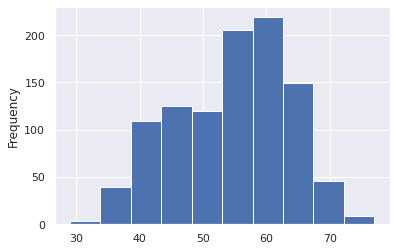

In [ ]:
df['Age'].plot(kind= 'hist');

In [ ]:
df['Fasting_blood_sugar'].value_counts()

0    872
1    153
Name: Fasting_blood_sugar, dtype: int64

In [ ]:
pd.crosstab(df['Heart_disease'],df['Fasting_blood_sugar'])

Fasting_blood_sugar,0,1
Heart_disease,,
0,417,82
1,455,71


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

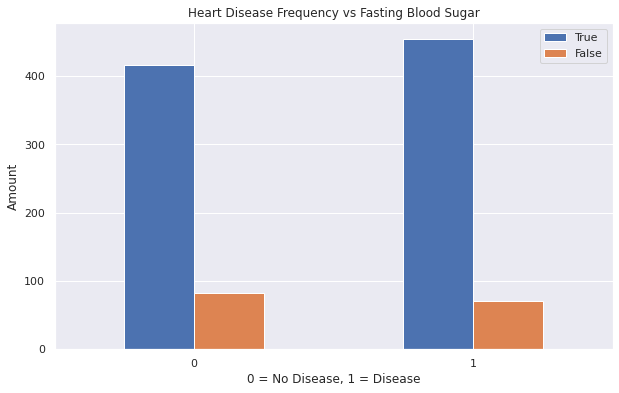

In [ ]:
pd.crosstab(df['Heart_disease'],df['Fasting_blood_sugar']). plot (kind="bar", figsize=(10,6));
plt.title("Heart Disease Frequency vs Fasting Blood Sugar")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["True", "False"])
plt.xticks(rotation=0)


In [ ]:
df['ECG_results'].value_counts()

1    513
0    497
2     15
Name: ECG_results, dtype: int64

In [ ]:
pd.crosstab(df['Heart_disease'], df['ECG_results'])

ECG_results,0,1,2
Heart_disease,,,
0,283,204,12
1,214,309,3


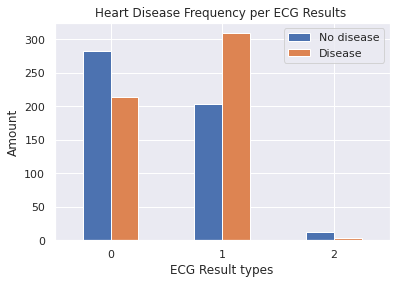

In [ ]:
pd.crosstab(df['ECG_results'], df['Heart_disease']).plot(kind='bar')
plt.title("Heart Disease Frequency per ECG Results ")
plt.xlabel("ECG Result types")
plt.ylabel("Amount")
plt.legend (['No disease', 'Disease'])
plt.xticks(rotation=0);

In [ ]:
df['Thalessemia_types'].value_counts()





2    544
3    410
1     64
0      7
Name: Thalessemia_types, dtype: int64

In [ ]:
pd.crosstab(df['Heart_disease'],df['Thalessemia_types'])

Thalessemia_types,0,1,2,3
Heart_disease,,,,
0,4,43,132,320
1,3,21,412,90


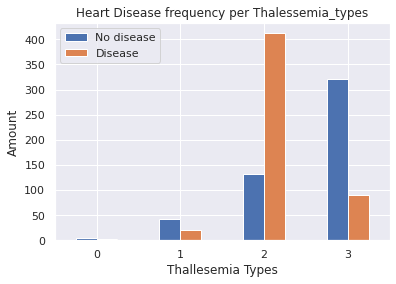

In [ ]:
pd.crosstab(df['Thalessemia_types'],df['Heart_disease']).plot(kind='bar')
plt.title("Heart Disease frequency per Thalessemia_types")
plt.xlabel("Thallesemia Types")
plt.ylabel("Amount")
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation=0);

TypeError: ignored

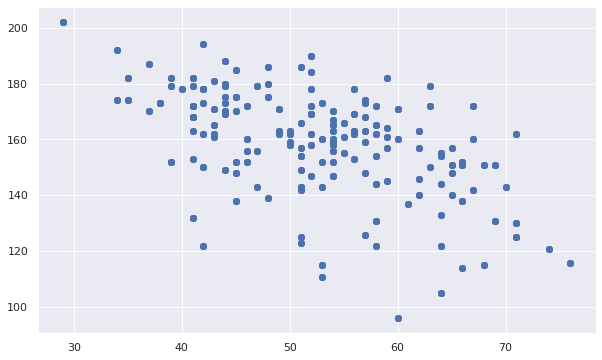

In [ ]:
plt.figure(figsize=(10,6))
#Target is equal to 1
plt.scatter(x= df[df['Heart_disease'] ==1]['Age'], y= df.Maximum_heart_rate[df.Heart_disease==1])

#Target is equal to 0
plt.scatter(x= df[df['Heart_disease']==0]('Age'), y = df.Maximum_heart_rate[df.Heart_disease==0],);

#Adding some helpful information
plt.title("Heart disease in function of Age and Max Heart rate Rate")
plt.xlabel("Age")
plt.ylabel("Max.Heart Rate")
plt.legend(["Disease", "No disease"])

In [ ]:
df['Age'].plot(kind= 'hist');


KeyError: ignored

In [ ]:
df['Chest_pain'].value_counts()

0    497
2    284
1    167
3     77
Name: Chest_pain, dtype: int64

In [ ]:
pd.crosstab(df['Chest_pain'],df['Heart_disease'])


Heart_disease,0,1
Chest_pain,,
0,375,122
1,33,134
2,65,219
3,26,51


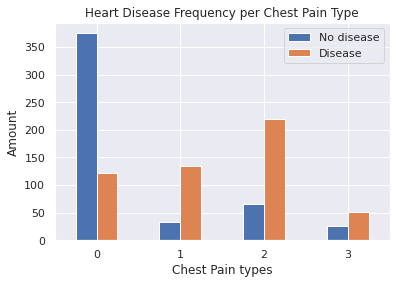

In [ ]:
pd.crosstab(df['Chest_pan'], df[ 'Heart_disease']). plot (kind='bar')
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain types")
plt.ylabel("Amount")
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation=0);

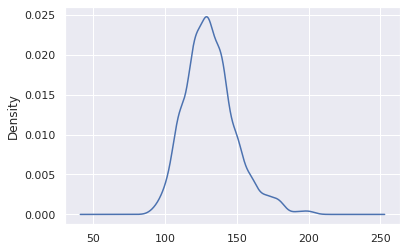

In [ ]:
df['Resting_blood_pressure'].plot(kind='kde')

Text(0.5, 1.0, 'Relation Between heart rate slope and cholestrol level with respect to gender')

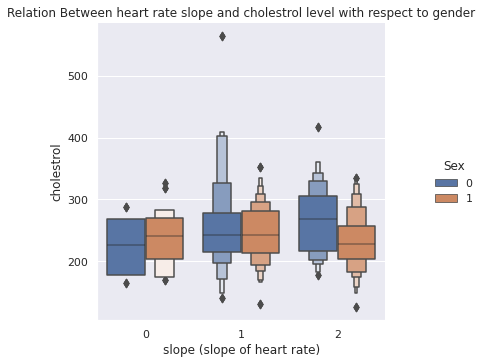

In [ ]:
sns.catplot(x="ST_slope", y="Cholestrol", hue="Sex", kind="boxen", data=df)
plt.xlabel('slope (slope of heart rate)')
plt.ylabel('cholestrol')
plt.title(label="Relation Between heart rate slope and cholestrol level with respect to gender", loc ='center')

NameError: ignored

In [ ]:
# statistical measures of the data
df.describe()
print(df.describe())










               Age          Sex   Chest_pain  Resting_blood_pressure  \
count  1025.000000  1025.000000  1025.000000             1025.000000   
mean     54.434146     0.695610     0.942439              131.611707   
std       9.072290     0.460373     1.029641               17.516718   
min      29.000000     0.000000     0.000000               94.000000   
25%      48.000000     0.000000     0.000000              120.000000   
50%      56.000000     1.000000     1.000000              130.000000   
75%      61.000000     1.000000     2.000000              140.000000   
max      77.000000     1.000000     3.000000              200.000000   

       Cholestrol  Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
count  1025.00000          1025.000000  1025.000000         1025.000000   
mean    246.00000             0.149268     0.529756          149.114146   
std      51.59251             0.356527     0.527878           23.005724   
min     126.00000             0.000000     0.000000

In [ ]:
# checking the distribution of target variable
df['Heart_disease'].value_counts()
print(df['Heart_disease'].value_counts())

# 1 - DEFECTIVE HEART
# 0 - HEALTHY HEART

1    526
0    499
Name: Heart_disease, dtype: int64


In [ ]:
# Splitting the Features and Target
X = df.drop(columns= 'Heart_disease', axis=1)
Y = df['Heart_disease']
print(X)
print(Y)

      Age  Sex  Chest_pain  Resting_blood_pressure  Cholestrol  \
0      52    1           0                     125         212   
1      53    1           0                     140         203   
2      70    1           0                     145         174   
3      61    1           0                     148         203   
4      62    0           0                     138         294   
...   ...  ...         ...                     ...         ...   
1020   59    1           1                     140         221   
1021   60    1           0                     125         258   
1022   47    1           0                     110         275   
1023   50    0           0                     110         254   
1024   54    1           0                     120         188   

      Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
0                       0            1                 168   
1                       1            0                 155   
2                    

In [ ]:
# Splitting the data into Training Data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [ ]:
#   Model Training
LogisticRegression
model = LogisticRegression()
# training the LogisticRegression model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Model Evaluation
#Accuracy Score
# accuracy on Training Data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data :', training_data_accuracy)

Accuracy on Training Data : 0.8524390243902439


In [ ]:
# accuracy on Testing Data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data :', test_data_accuracy)

Accuracy on Test Data : 0.8048780487804879


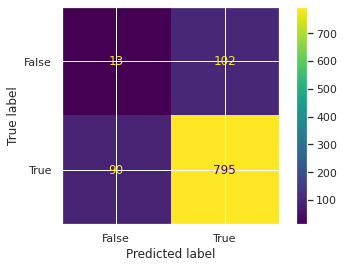

In [ ]:
from matplotlib import numpy
from matplotlib import numpy
actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


In [ ]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.808


In [ ]:
Precision = metrics.precision_score(actual, predicted)
print(Precision)

0.8862876254180602


In [ ]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(Sensitivity_recall)



0.8983050847457628


In [ ]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(Specificity)

0.11304347826086956


In [ ]:
F1_score = metrics.f1_score(actual, predicted)
print(F1_score)

0.8922558922558924
